In [1]:
import keras
import numpy as np
import pandas as pd
from PIL import Image as img

C:\Users\Pc\Anaconda3.5\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
keras.backend.image_data_format()

'channels_last'

In [4]:
keras.backend.set_image_data_format('channels_first')
keras.backend.image_data_format()

'channels_first'

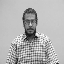

In [5]:
img.open(r'..\cnn\CNN_Cinsiyet\veriler\training_set\erkek\AbdA_00002_m_31_i_fr_nc_sr_2016_2_e0_nl_o.jpg').resize((64,64)).convert('L')

In [6]:
#img.open(r'..\cnn\CNN_Cinsiyet\veriler\training_set\AlyM_00521_f_18_o_nf_cr_no_2015_1_e0_nl_o.jpg').resize((64,64)).convert('L')

### Data Load(for trainig)

In [9]:
male_train_list = glob.glob(r"..\cnn\CNN_Cinsiyet\veriler\training_set\erkek\*.jpg")
female_train_list = glob.glob(r"..\cnn\CNN_Cinsiyet\veriler\training_set\kadin\*.jpg")

In [10]:
#male_train_list

In [11]:
x_train = []

for i in tqdm(female_train_list):
    temp = img.open(i).resize((64,64)).convert('L')
    
    x_train.append((np.array(temp) - np.mean(temp)) / np.std(temp))
        
    x_train.append((np.array(temp.rotate(90)) - np.mean(temp)) / np.std(temp))
    
    x_train.append((np.array(temp.rotate(180)) - np.mean(temp)) / np.std(temp))
    
    x_train.append((np.array(temp.rotate(270)) - np.mean(temp)) / np.std(temp))
    
y_train = np.tile(1 , len(female_train_list)*4)

    
print('done')

100%|██████████████████████████████████████████████████████████████████████████████| 1030/1030 [00:22<00:00, 45.21it/s]


done


In [12]:
for i in tqdm(male_train_list):
    temp = img.open(i).resize((64,64)).convert('L')
    
    x_train.append((np.array(temp) - np.mean(temp)) / np.std(temp))
        
    x_train.append((np.array(temp.rotate(90)) - np.mean(temp)) / np.std(temp))
    
    x_train.append((np.array(temp.rotate(180)) - np.mean(temp)) / np.std(temp))
    
    x_train.append((np.array(temp.rotate(270)) - np.mean(temp)) / np.std(temp))
    
y_train = np.concatenate((y_train, np.tile(0, len(male_train_list)*4))).astype("uint8")
    
print('done')

100%|██████████████████████████████████████████████████████████████████████████████| 1632/1632 [00:35<00:00, 42.00it/s]


done


In [13]:
y_train

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [14]:
a = np.asarray(x_train)
x_train = a.reshape(a.shape[0], 1, a.shape[1], a.shape[2])

In [15]:
x_train.shape

(10648, 1, 64, 64)

In [16]:
y_train.shape

(10648,)

In [17]:
del(a)


In [18]:
LeakyReLU = keras.layers.LeakyReLU(alpha=0.01)

In [19]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=(2, 2), input_shape=(1, 64, 64)))
model.add(LeakyReLU)
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3)))
model.add(LeakyReLU)
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Conv2D(filters=64, activation="relu", kernel_size=(3, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=12, activation="relu"))
model.add(keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
model.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.binary_crossentropy,
              metrics=["binary_accuracy"])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 63, 63)        160       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 63, 63)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 61, 61)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 61, 61)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 59, 59)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 19, 19)        0         
__________

### Model Tranining

In [25]:
model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.1, shuffle=True)

Train on 9583 samples, validate on 1065 samples
Epoch 1/5


5056/9583 [==============>...............] - ETA: 57:47 - loss: 0.6894 - binary_accuracy: 0.50 - ETA: 29:16 - loss: 0.6913 - binary_accuracy: 0.54 - ETA: 19:45 - loss: 0.6966 - binary_accuracy: 0.47 - ETA: 15:00 - loss: 0.6920 - binary_accuracy: 0.52 - ETA: 12:09 - loss: 0.6852 - binary_accuracy: 0.54 - ETA: 10:14 - loss: 0.6877 - binary_accuracy: 0.53 - ETA: 8:53 - loss: 0.6841 - binary_accuracy: 0.5580 - ETA: 7:51 - loss: 0.6801 - binary_accuracy: 0.562 - ETA: 7:03 - loss: 0.6815 - binary_accuracy: 0.562 - ETA: 6:25 - loss: 0.6815 - binary_accuracy: 0.559 - ETA: 5:54 - loss: 0.6788 - binary_accuracy: 0.576 - ETA: 5:27 - loss: 0.6797 - binary_accuracy: 0.570 - ETA: 5:06 - loss: 0.6814 - binary_accuracy: 0.562 - ETA: 4:47 - loss: 0.6837 - binary_accuracy: 0.553 - ETA: 4:30 - loss: 0.6845 - binary_accuracy: 0.550 - ETA: 4:17 - loss: 0.6848 - binary_accuracy: 0.544 - ETA: 4:05 - loss: 0.6859 - binary_accuracy: 0.538 - ETA: 3:54 - loss: 0.6847 - binary_accuracy: 0.541 - ETA: 3:45 - loss: 

5152/9583 [===============>..............] - ETA: 1:06 - loss: 0.3995 - binary_accuracy: 0.843 - ETA: 1:06 - loss: 0.4857 - binary_accuracy: 0.781 - ETA: 1:09 - loss: 0.5189 - binary_accuracy: 0.760 - ETA: 1:09 - loss: 0.4924 - binary_accuracy: 0.789 - ETA: 1:10 - loss: 0.5005 - binary_accuracy: 0.768 - ETA: 1:09 - loss: 0.5157 - binary_accuracy: 0.734 - ETA: 1:09 - loss: 0.4926 - binary_accuracy: 0.767 - ETA: 1:09 - loss: 0.5047 - binary_accuracy: 0.757 - ETA: 1:09 - loss: 0.5023 - binary_accuracy: 0.767 - ETA: 1:08 - loss: 0.4981 - binary_accuracy: 0.775 - ETA: 1:08 - loss: 0.4950 - binary_accuracy: 0.772 - ETA: 1:08 - loss: 0.4830 - binary_accuracy: 0.781 - ETA: 1:08 - loss: 0.4811 - binary_accuracy: 0.786 - ETA: 1:08 - loss: 0.4803 - binary_accuracy: 0.787 - ETA: 1:07 - loss: 0.4818 - binary_accuracy: 0.785 - ETA: 1:07 - loss: 0.4829 - binary_accuracy: 0.783 - ETA: 1:07 - loss: 0.4840 - binary_accuracy: 0.781 - ETA: 1:07 - loss: 0.4873 - binary_accuracy: 0.776 - ETA: 1:07 - loss: 0

9583/9583 [==============================] - ETA: 33s - loss: 0.4299 - binary_accuracy: 0.80 - ETA: 33s - loss: 0.4297 - binary_accuracy: 0.80 - ETA: 32s - loss: 0.4295 - binary_accuracy: 0.80 - ETA: 32s - loss: 0.4285 - binary_accuracy: 0.80 - ETA: 32s - loss: 0.4292 - binary_accuracy: 0.80 - ETA: 32s - loss: 0.4288 - binary_accuracy: 0.80 - ETA: 31s - loss: 0.4276 - binary_accuracy: 0.80 - ETA: 31s - loss: 0.4278 - binary_accuracy: 0.80 - ETA: 31s - loss: 0.4270 - binary_accuracy: 0.80 - ETA: 31s - loss: 0.4272 - binary_accuracy: 0.80 - ETA: 31s - loss: 0.4269 - binary_accuracy: 0.80 - ETA: 30s - loss: 0.4298 - binary_accuracy: 0.80 - ETA: 30s - loss: 0.4299 - binary_accuracy: 0.80 - ETA: 30s - loss: 0.4293 - binary_accuracy: 0.80 - ETA: 30s - loss: 0.4287 - binary_accuracy: 0.80 - ETA: 29s - loss: 0.4287 - binary_accuracy: 0.80 - ETA: 29s - loss: 0.4290 - binary_accuracy: 0.80 - ETA: 29s - loss: 0.4279 - binary_accuracy: 0.80 - ETA: 29s - loss: 0.4274 - binary_accuracy: 0.80 - ETA: 

5152/9583 [===============>..............] - ETA: 1:07 - loss: 0.3285 - binary_accuracy: 0.906 - ETA: 1:10 - loss: 0.3083 - binary_accuracy: 0.906 - ETA: 1:11 - loss: 0.2700 - binary_accuracy: 0.906 - ETA: 1:12 - loss: 0.2936 - binary_accuracy: 0.890 - ETA: 1:12 - loss: 0.3686 - binary_accuracy: 0.856 - ETA: 1:11 - loss: 0.4287 - binary_accuracy: 0.807 - ETA: 1:11 - loss: 0.4223 - binary_accuracy: 0.808 - ETA: 1:11 - loss: 0.4034 - binary_accuracy: 0.812 - ETA: 1:11 - loss: 0.3906 - binary_accuracy: 0.822 - ETA: 1:10 - loss: 0.3831 - binary_accuracy: 0.828 - ETA: 1:10 - loss: 0.3841 - binary_accuracy: 0.826 - ETA: 1:10 - loss: 0.3766 - binary_accuracy: 0.830 - ETA: 1:10 - loss: 0.3686 - binary_accuracy: 0.836 - ETA: 1:10 - loss: 0.3715 - binary_accuracy: 0.837 - ETA: 1:10 - loss: 0.3785 - binary_accuracy: 0.831 - ETA: 1:09 - loss: 0.3742 - binary_accuracy: 0.835 - ETA: 1:09 - loss: 0.3624 - binary_accuracy: 0.841 - ETA: 1:09 - loss: 0.3614 - binary_accuracy: 0.842 - ETA: 1:08 - loss: 0

5152/9583 [===============>..............] - ETA: 1:13 - loss: 0.3019 - binary_accuracy: 0.875 - ETA: 1:11 - loss: 0.2682 - binary_accuracy: 0.875 - ETA: 1:13 - loss: 0.2740 - binary_accuracy: 0.864 - ETA: 1:12 - loss: 0.2723 - binary_accuracy: 0.882 - ETA: 1:12 - loss: 0.3024 - binary_accuracy: 0.862 - ETA: 1:12 - loss: 0.3168 - binary_accuracy: 0.864 - ETA: 1:11 - loss: 0.3062 - binary_accuracy: 0.866 - ETA: 1:11 - loss: 0.2876 - binary_accuracy: 0.882 - ETA: 1:11 - loss: 0.2830 - binary_accuracy: 0.881 - ETA: 1:11 - loss: 0.2897 - binary_accuracy: 0.875 - ETA: 1:10 - loss: 0.2861 - binary_accuracy: 0.872 - ETA: 1:10 - loss: 0.2827 - binary_accuracy: 0.872 - ETA: 1:10 - loss: 0.2802 - binary_accuracy: 0.872 - ETA: 1:10 - loss: 0.2815 - binary_accuracy: 0.870 - ETA: 1:09 - loss: 0.2755 - binary_accuracy: 0.875 - ETA: 1:09 - loss: 0.2730 - binary_accuracy: 0.877 - ETA: 1:09 - loss: 0.2706 - binary_accuracy: 0.878 - ETA: 1:09 - loss: 0.2724 - binary_accuracy: 0.878 - ETA: 1:09 - loss: 0

9583/9583 [==============================] - ETA: 34s - loss: 0.2792 - binary_accuracy: 0.86 - ETA: 33s - loss: 0.2790 - binary_accuracy: 0.86 - ETA: 33s - loss: 0.2799 - binary_accuracy: 0.86 - ETA: 33s - loss: 0.2798 - binary_accuracy: 0.86 - ETA: 33s - loss: 0.2812 - binary_accuracy: 0.86 - ETA: 32s - loss: 0.2811 - binary_accuracy: 0.86 - ETA: 32s - loss: 0.2807 - binary_accuracy: 0.86 - ETA: 32s - loss: 0.2808 - binary_accuracy: 0.86 - ETA: 32s - loss: 0.2813 - binary_accuracy: 0.86 - ETA: 31s - loss: 0.2813 - binary_accuracy: 0.86 - ETA: 31s - loss: 0.2807 - binary_accuracy: 0.86 - ETA: 31s - loss: 0.2811 - binary_accuracy: 0.86 - ETA: 31s - loss: 0.2807 - binary_accuracy: 0.86 - ETA: 30s - loss: 0.2812 - binary_accuracy: 0.86 - ETA: 30s - loss: 0.2809 - binary_accuracy: 0.86 - ETA: 30s - loss: 0.2806 - binary_accuracy: 0.86 - ETA: 30s - loss: 0.2800 - binary_accuracy: 0.86 - ETA: 29s - loss: 0.2801 - binary_accuracy: 0.86 - ETA: 29s - loss: 0.2806 - binary_accuracy: 0.86 - ETA: 

5152/9583 [===============>..............] - ETA: 1:10 - loss: 0.1554 - binary_accuracy: 0.968 - ETA: 1:14 - loss: 0.1498 - binary_accuracy: 0.953 - ETA: 1:12 - loss: 0.1597 - binary_accuracy: 0.927 - ETA: 1:12 - loss: 0.1575 - binary_accuracy: 0.929 - ETA: 1:11 - loss: 0.1699 - binary_accuracy: 0.931 - ETA: 1:11 - loss: 0.1756 - binary_accuracy: 0.932 - ETA: 1:11 - loss: 0.1821 - binary_accuracy: 0.919 - ETA: 1:11 - loss: 0.1855 - binary_accuracy: 0.918 - ETA: 1:11 - loss: 0.1881 - binary_accuracy: 0.913 - ETA: 1:11 - loss: 0.1906 - binary_accuracy: 0.912 - ETA: 1:11 - loss: 0.1852 - binary_accuracy: 0.917 - ETA: 1:10 - loss: 0.1981 - binary_accuracy: 0.908 - ETA: 1:10 - loss: 0.2026 - binary_accuracy: 0.906 - ETA: 1:10 - loss: 0.2166 - binary_accuracy: 0.899 - ETA: 1:09 - loss: 0.2081 - binary_accuracy: 0.904 - ETA: 1:09 - loss: 0.2145 - binary_accuracy: 0.900 - ETA: 1:09 - loss: 0.2116 - binary_accuracy: 0.902 - ETA: 1:09 - loss: 0.2136 - binary_accuracy: 0.901 - ETA: 1:09 - loss: 0

In [26]:
model.save("model_01.h5")
model.save("keras_model_web.pkl")

In [28]:

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [29]:
np.arange(1, len(model.history.history["binary_accuracy"])+1, 1)

array([1, 2, 3, 4, 5])

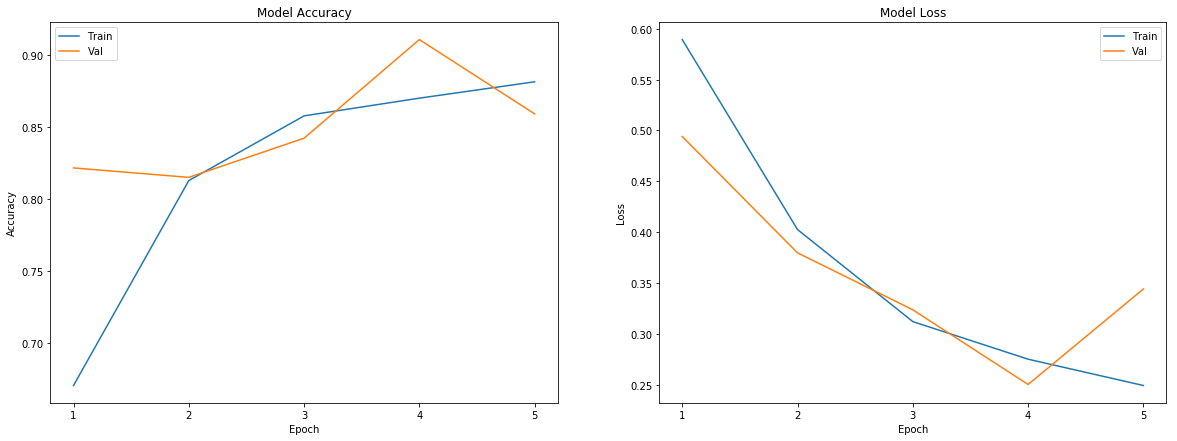

In [30]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(model.history.history["binary_accuracy"])
plt.plot(model.history.history["val_binary_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
#plt.xticks(np.arange(0, len(model.history.history["binary_accuracy"]), 1))

plt.xticks(np.arange(len(model.history.history["binary_accuracy"])), np.arange(1, len(model.history.history["binary_accuracy"])+1, 1))

plt.subplot(1, 2, 2)
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.xticks(np.arange(len(model.history.history["loss"])), np.arange(1, len(model.history.history["loss"])+1, 1))
plt.show()

extra

In [50]:
model = keras.models.load_model("model_01.h5")

In [23]:
model.fit(x=x_train, y=y_train, epochs=1, validation_split=0.1, shuffle=True)

Train on 9583 samples, validate on 1065 samples
Epoch 1/1
4992/9583 [==============>...............] - ETA: 14:46 - loss: 0.6809 - binary_accuracy: 0.65 - ETA: 13:17 - loss: 0.6427 - binary_accuracy: 0.68 - ETA: 12:38 - loss: 0.6452 - binary_accuracy: 0.67 - ETA: 12:00 - loss: 0.6580 - binary_accuracy: 0.65 - ETA: 11:27 - loss: 0.6616 - binary_accuracy: 0.64 - ETA: 11:04 - loss: 0.6626 - binary_accuracy: 0.64 - ETA: 10:48 - loss: 0.6580 - binary_accuracy: 0.64 - ETA: 10:35 - loss: 0.6658 - binary_accuracy: 0.62 - ETA: 10:25 - loss: 0.6698 - binary_accuracy: 0.61 - ETA: 10:23 - loss: 0.6692 - binary_accuracy: 0.60 - ETA: 10:15 - loss: 0.6706 - binary_accuracy: 0.60 - ETA: 10:07 - loss: 0.6710 - binary_accuracy: 0.60 - ETA: 10:01 - loss: 0.6700 - binary_accuracy: 0.60 - ETA: 9:56 - loss: 0.6698 - binary_accuracy: 0.5982 - ETA: 9:51 - loss: 0.6680 - binary_accuracy: 0.602 - ETA: 9:46 - loss: 0.6692 - binary_accuracy: 0.599 - ETA: 9:41 - loss: 0.6705 - binary_accuracy: 0.597 - ETA: 9:41 - 

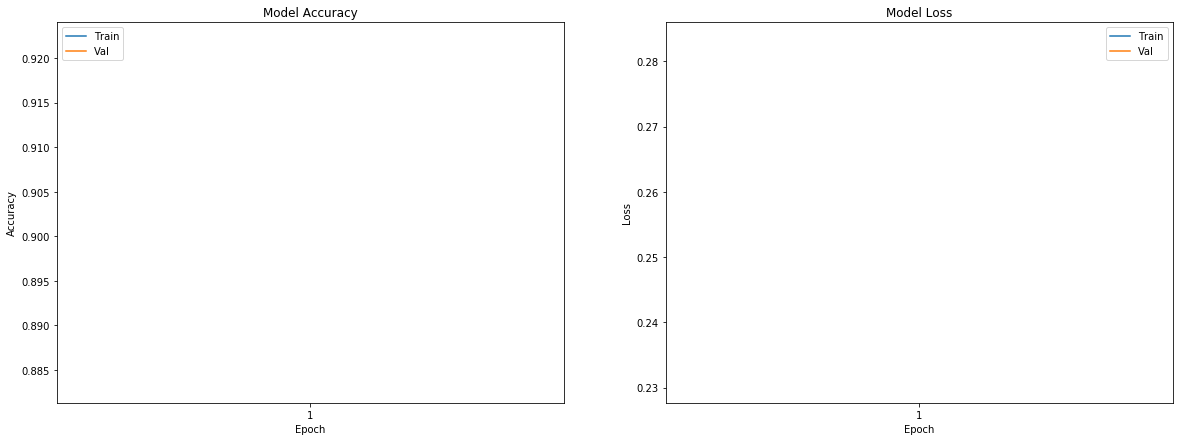

### Data Load(train set)

In [31]:
test_list1 = glob.glob(r"..\cnn\CNN_Cinsiyet\veriler\test_set\erkek\*.jpg")
test_list2 = glob.glob(r"..\cnn\CNN_Cinsiyet\veriler\test_set\kadin\*.jpg")
test_list = test_list1 + test_list2

In [32]:
x_test = []

for i in tqdm(test_list):
    temp = img.open(i).resize((64, 64))
    temp = temp.convert("L")
    x_test.append((np.array(temp) - np.mean(temp)) / np.std(temp))#scaling

print("test images loading is done")

100%|████████████████████████████████████████████████████████████████████████████████| 203/203 [00:03<00:00, 59.44it/s]


test images loading is done


In [33]:
x_test

[array([[0.04898993, 0.14261539, 0.18942812, ..., 0.56392994, 0.54052358,
         0.44689812],
        [0.0723963 , 0.14261539, 0.16602175, ..., 0.56392994, 0.56392994,
         0.49371085],
        [0.09580266, 0.16602175, 0.16602175, ..., 0.54052358, 0.51711721,
         0.49371085],
        ...,
        [0.11920902, 0.16602175, 0.16602175, ..., 0.30645994, 0.28305357,
         0.25964721],
        [0.04898993, 0.11920902, 0.16602175, ..., 0.25964721, 0.25964721,
         0.18942812],
        [0.0021772 , 0.04898993, 0.14261539, ..., 0.25964721, 0.21283448,
         0.14261539]]),
 array([[ 0.03084972,  0.10170607,  0.17256241, ...,  0.55046289,
          0.50322533,  0.40875021],
        [ 0.07808728,  0.14894363,  0.14894363, ...,  0.55046289,
          0.50322533,  0.45598777],
        [ 0.10170607,  0.10170607,  0.17256241, ...,  0.55046289,
          0.50322533,  0.47960655],
        ...,
        [ 0.10170607,  0.17256241,  0.17256241, ...,  0.26703753,
          0.24341875,  0

In [34]:
a = np.asarray(x_test)
x_test = a.reshape(a.shape[0], 1, a.shape[1], a.shape[2])

In [35]:
del(a)

## Predict

In [36]:
result = model.predict(x=x_test)

In [37]:
idx = []
for i in test_list:
    idx.append(i[35:-4])

In [38]:
idx

['t\\erkek\\AbdA_00001_m_31_i_fr_nc_no_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00002_m_31_i_fr_nc_sr_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00003_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00004_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00005_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00006_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00007_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00008_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00009_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00010_m_31_i_fr_nc_hp_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00011_m_31_i_fr_nc_sr_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00012_m_31_i_fr_nc_sr_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00013_m_31_i_fr_nc_sr_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00014_m_31_i_fr_nc_sr_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00015_m_31_i_fr_nc_no_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00016_m_31_i_fr_nc_no_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00017_m_31_i_fr_nc_no_2016_2_e0_nl_o',
 't\\erkek\\AbdA_00018_m_31_i_fr_nc_no_2016_2_e0

In [39]:
result = result.reshape(result.shape[0])
result[result>0.5] = 1
result[result<0.5] = 0

In [40]:
submission = {"id": idx, "label": result}

In [41]:
pd.DataFrame(submission).to_csv("submission.csv", index=False)

In [42]:
pd.DataFrame(submission)

,id,label
0,t\erkek\AbdA_00001_m_31_i_fr_nc_no_2016_2_e0_nl_o,0.0
1,t\erkek\AbdA_00002_m_31_i_fr_nc_sr_2016_2_e0_nl_o,0.0
2,t\erkek\AbdA_00003_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
3,t\erkek\AbdA_00004_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
4,t\erkek\AbdA_00005_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
5,t\erkek\AbdA_00006_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
6,t\erkek\AbdA_00007_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
7,t\erkek\AbdA_00008_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
8,t\erkek\AbdA_00009_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
9,t\erkek\AbdA_00010_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0


In [48]:
### load model

In [44]:
from keras.models import model_from_json
from keras.models import load_model
model2 = load_model('model_01.h5')

In [46]:
result = model2.predict(x=x_test)
idx = []
for i in test_list:
    idx.append(i[35:-4])
result = result.reshape(result.shape[0])
result[result>0.5] = 1
result[result<0.5] = 0
submission2 = {"id": idx, "label": result}
pd.DataFrame(submission2).to_csv("submission2.csv", index=False)

In [47]:
pd.DataFrame(submission2)

,id,label
0,t\erkek\AbdA_00001_m_31_i_fr_nc_no_2016_2_e0_nl_o,0.0
1,t\erkek\AbdA_00002_m_31_i_fr_nc_sr_2016_2_e0_nl_o,0.0
2,t\erkek\AbdA_00003_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
3,t\erkek\AbdA_00004_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
4,t\erkek\AbdA_00005_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
5,t\erkek\AbdA_00006_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
6,t\erkek\AbdA_00007_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
7,t\erkek\AbdA_00008_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
8,t\erkek\AbdA_00009_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
9,t\erkek\AbdA_00010_m_31_i_fr_nc_hp_2016_2_e0_nl_o,0.0
